# Introduction to the analysis of biological circuits   

## First circuit. The Feedforward loop

A Feedforward Loop (FFL) is a common and important motif found in biological networks, especially in gene regulatory networks. It consists of three elements (such as genes or proteins) and the connections between them, forming a directed network. In an FFL, one element regulates a second, which in turn regulates a third, and additionally, the first element also directly regulates the third. This creates a loop with two pathways from the first to the third element: a direct one and an indirect one that goes through the second element.

We will use boolean networks where the relationships (activation or inhibition) between the elements of the circuits are logical functions (AND, OR, NOT). For instance, let's define the following FFL:

---
    X inhibits Y
    Y activates Z
    X inhibits Z
---
The representation of this FFL in .bnet notation (a common format for boolean networks) is:

    X, <Boolean function for X>
    Y, !X
    Z, Y and !X
    

Based on the description of your feedforward loop (FFL), where X inhibits Y, Y activates Z, and X also inhibits Z, the `.bnet` representation would look like this:

```
X, <Boolean function for X>
Y, !X
Z, Y and !X
```

In this representation:
- `X` is a node whose behavior or state is determined by some other factors not specified in the FFL. Therefore, its Boolean function will depend on external inputs or conditions, which is why we have `<Boolean function for X>`. If X is always active or its state is constant, we can replace this with `True` or `False` accordingly.
- `Y` is inhibited by `X`, which is represented by `!X`, meaning `Y` is active when `X` is not active.
- `Z` is activated by `Y` and inhibited by `X`. The `and` logic in `Y and !X` means that `Z` is active only when `Y` is active and `X` is not active.

This setup creates an incoherent type 1 feedforward loop, as the direct regulation (X inhibiting Z) is opposite in effect to the indirect regulation (X inhibiting Y, and Y activating Z).

### Types of FFL
There are different types of FFLs based on the nature of the regulatory interactions (activation or inhibition). The most common types are:

-   Coherent FFL: Where the direct and indirect pathways act in the same way (both activating or both inhibiting) on the target gene.
-   Incoherent FFL: Where the direct and indirect pathways have opposite effects on the target gene.

FFLs are important in signal transduction because they can filter noise. FFLs, especially the type 1 coherent FFL (C1-FFL), are believed to evolve to filter out short spurious signals. This adaptive feature helps in distinguishing between short-lived noise and sustained signals, contributing to more reliable responses.

## Boolean networks
Boolean networks are a mathematical model used to represent and analyze complex systems, particularly in fields like biology. They consist of a set of nodes and edges, where each node represents a variable that can take on one of two states: true or false (often represented as 1 or 0). The edges between nodes represent the interactions or logical relationships between these variables.

Key characteristics and principles of Boolean networks include:

- **Discrete States:** Each node in a Boolean network can only be in one of two states: on (1) or off (0). This binary nature simplifies the modeling of complex systems.
- **Update Rules:** Each node's state is determined by a specific Boolean function or rule, which takes the states of its input nodes (neighbors) as arguments. These rules define how the state of each node changes over time.
- **Dynamics:** The network evolves over time according to its update rules. This can be done synchronously, where all nodes update their state simultaneously, or asynchronously, where nodes update their state one at a time in a sequential or random order.
- **Attractors and State Space:** The evolution of a Boolean network over time leads to certain patterns or attractors in its state space. An attractor can be a stable state (where the network remains constant) or a limit cycle (where the network repeats a sequence of states). The study of these attractors can reveal important behavior and properties of the system.

In biological systems, Boolean networks are often used to model gene regulatory networks, where nodes represent genes, and edges represent regulatory interactions. The binary states can represent whether a gene is expressed or not.

## The C1 feed-forward loop
### Understanding C1-FFL

In a C1-FFL, you have three nodes: X, Y, and Z. X activates Y, and both X and Y are required to activate Z. In Boolean terms:

    Y = X
    Z = X AND Y

This means Z is activated only when both X and Y are active.

A FFL exhibits two interesting properties: delay and persisence:
- **Delay** refers to the time taken for the output node to respond to a change in the state of the input node. Since Y is directly activated by X, and Z is activated by both X and Y, this loop shows delay because Z requires the activation of both X and Y. Even if X is activated quickly, there is a lag before Y becomes active, and subsequently, Z gets activated. This delay is significant in biological systems for timing the response to stimuli or ensuring that responses only occur under sustained input conditions.
- **Persistence** refers to the ability of the output node to maintain its state (usually active) after the input node has reverted to its initial state (usually inactive). This is important in biological systems where a prolonged response is required even after the initial stimulus has ceased. It ensures that the system's response is not just a brief, transient reaction but a more sustained one, appropriate for processes that need more prolonged activation.

<!-- Cosas que hacer
Analyzing the signal processing capabilities of a coherent type-1 feedforward loop (C1-FFL) using a Boolean network involves simulating how the FFL responds to various input signals. Here's an example approach to study this:

### Understanding C1-FFL

In a C1-FFL, you have three nodes: X, Y, and Z. X activates Y, and both X and Y are required to activate Z. In Boolean terms:

- Y = X
- Z = X AND Y

This means Z is activated only when both X and Y are active.

### Analyzing Signal Processing

1. **Setup the Boolean Network Model:**
   - Define the nodes and their Boolean update rules as per the C1-FFL logic.

2. **Design Input Signals:**
   - Create different input patterns for node X (the initial regulator). For example, a sustained signal (X stays 'on'), a pulse (X is 'on' for a short period), or an oscillating signal (X switches between 'on' and 'off').

3. **Simulate Network Response:**
   - For each input pattern, simulate the network's response over time.
   - Record the states of Y and Z at each time step.

4. **Analyze Delay and Persistence:**
   - Observe the delay between the activation of X and the response in Z.
   - Check how long Z stays active after X is turned off. The C1-FFL is known for its feature of 'persistence detection,' meaning Z should remain active for a while even after X is deactivated.

5. **Response to Noise:**
   - Introduce random fluctuations in the input signal to X and observe how the network dampens or amplifies this noise.
   - C1-FFLs are expected to filter out brief fluctuations in X's signal, only responding to sustained activation.

6. **Comparative Analysis:**
   - Compare the response of the C1-FFL with a simple direct regulation model (where X directly activates Z without Y).
   - This comparison highlights the signal processing advantages of the C1-FFL structure.

7. **Visualization:**
   - Visualize the network's response over time using graphs or plots. This can help in understanding the dynamics and timing of signal processing.

8. **Sensitivity Analysis:**
   - Test how changes in the update rules or the introduction of delays affect the signal processing capabilities.

### Conclusion

Through this analysis, you will gain insights into how the C1-FFL processes signals, particularly in terms of filtering noise, creating a delay in the response, and enabling persistence in the output. This approach is not only useful for understanding biological systems but can also inform synthetic biology designs and the development of bio-inspired computational models.
-->

## Work with PyBoolNet

PyBoolNet is a Python package designed for the creation, analysis, and visualization of Boolean networks. The key features of PyBoolNet include:

1. **Network Creation and Management:** It allows users to create Boolean networks from various sources, including text files and logical formulas. It also provides functionality to manipulate and manage these networks.

2. **Steady State and Attractor Analysis:** PyBoolNet can compute steady states and attractors, which are key concepts in understanding the long-term behavior of a system modeled by a Boolean network.

3. **Model Checking and Temporal Logic:** The package includes tools for model checking, which is a method for verifying if a model meets certain specifications. It also supports temporal logic, a formalism used to reason about the behavior of a system over time.

4. **Visualization:** PyBoolNet offers capabilities to visually represent Boolean networks and their dynamics, which aids in the interpretation and analysis of the network’s behavior.

5. **Integration with Other Tools:** It can interface with other software tools commonly used in systems biology, allowing for a more comprehensive analysis.

Overall, PyBoolNet is a valuable tool for researchers and scientists in fields like systems biology, where understanding the dynamics of complex networks is crucial. Its combination of network analysis, model checking, and visualization tools makes it a versatile resource for studying Boolean network models.

## Analyse delay and persistence in a C1 FFL

### Install libraries
We need to install the Python modules we want to use in Google Colab.

In [1]:
!pip3 install networkx
!pip3 install git+https://github.com/hklarner/pyboolnet

  Cloning https://github.com/hklarner/pyboolnet to /tmp/pip-req-build-u8q24j7h
  Running command git clone --filter=blob:none --quiet https://github.com/hklarner/pyboolnet /tmp/pip-req-build-u8q24j7h
  Resolved https://github.com/hklarner/pyboolnet to commit 0f209cc7ba0d596f790b9584add27485879fe695
  Preparing metadata (setup.py) ... done
  Created wheel for pyboolnet: filename=pyboolnet-3.0.11-py3-none-any.whl size=4357445 sha256=1981e2bd972b5ab32454c160a2f5294228216aed58f81b0a107b82f1394a1a09
  Stored in directory: /tmp/pip-ephem-wheel-cache-utb3w7n0/wheels/46/0e/ce/ff6a66e82497bff96dab31657d81c773e2a590d2bd7d097e8a
Successfully built pyboolnet


### Load python modules

In [33]:
import pyboolnet
import ast
from pyboolnet import file_exchange # load and write the network to file
from pyboolnet import interaction_graphs as ig # create the networkx graph
import networkx as nx
import matplotlib.pyplot as plt
from pyboolnet import state_transition_graphs as STGs # To get the state transition graphs
import random # to choose one succesor state
from pyboolnet import attractors as AD # To detect attractors

### Generate the boolean network for the C1 FFL
In Python we represent prime implicants as nested dictionaries and lists. The prime implicants of a network with three components v1, v2, v3 and three update functions f1, f2, f3 that are defined by:

In [16]:
bnet = """
X, X           # Input node, always active once set
Y, X           # Intermediate node, activated by X
Z, X and Y     # Output node, activated by both X and Y
"""

PyBoolNet needs the prime implicants that are a fundamental concept used to represent the state transitions of Boolean networks in a detailed and mathematically rigorous way. They offer a more granular view of how the states of different nodes (or genes) in the network influence each other, compared to simpler representations like truth tables or the `.bnet` format.

Here's a breakdown of what prime implicants are and how they function within the context of PyBoolNet and Boolean network analysis:

1. **Definition**: 
   - A prime implicant in the context of Boolean networks is a minimal set of conditions that uniquely determine the state of a node. 
   - Each prime implicant represents a combination of states of other nodes that will lead to a particular state of the target node.

2. **Structure**:
   - In PyBoolNet, primes are represented as a dictionary where each key is a node in the network, and the value is a list of prime implicants for that node.
   - Each prime implicant is itself a list of dictionaries. Each dictionary represents a unique condition under which the node is active (or inactive).

3. **Example**:
   - Consider a simple network with two nodes, X and Y, where Y is activated if X is active. The primes might look like this:
     ```python
     primes = {
         'X': [[{'X': 1}], [{'X': 0}]],
         'Y': [[{'X': 1}], [{'X': 0}]]
     }
     ```
   - For `X`, the prime `[[{'X': 1}], [{'X': 0}]]` means that X stays in its current state (it's a self-loop).
   - For `Y`, the prime `[[{'X': 1}], [{'X': 0}]]` means that Y is active (`1`) when X is active (`{'X': 1}`), and Y is inactive (`0`) when X is inactive (`{'X': 0}`).

4. **Use in Analysis**:
   - Prime implicants are used in various types of analysis in PyBoolNet, such as computing attractors, creating state transition graphs, and performing model checking.
   - They provide a precise and compact way to represent the logic of the network, which is essential for computational analysis.

Understanding primes is crucial for effectively using PyBoolNet, as they are key to representing and analyzing the complex relationships in Boolean networks, especially in systems biology and related fields.

The following code converts the rules defined in bnet to primes, but it does not interpret the bnet correctly. Run the code and try to guess what is going on.

In [29]:
print(bnet)
primes = file_exchange.bnet2primes(bnet)

print(primes)


X, X           # Input node, always active once set
Y, X           # Intermediate node, activated by X
Z, X and Y     # Output node, activated by both X and Y

{'X': [[{'X': 0}], [{'X': 1}]], 'XandY': [[{'XandY': 0}], [{'XandY': 1}]], 'Y': [[{'X': 0}], [{'X': 1}]], 'Z': [[{'XandY': 0}], [{'XandY': 1}]]}


We can define the primes as a string and convert them to a dictionary so PyBoolNet can make things right

In [20]:
# Define the primes as a string
primes_string = """
{
    'X': [[{'X': 1}], [{'X': 0}]],
    'Y': [[{'X': 1}], [{'X': 0}]],
    'Z': [[{'X': 1, 'Y': 1}], [{'X': 0}, {'Y': 0}]]
}
"""

# Convert the string to a dictionary
primes = ast.literal_eval(primes_string)

# Now 'primes' is a dictionary that can be used with PyBoolNet

print(primes)

{'X': [[{'X': 1}], [{'X': 0}]], 'Y': [[{'X': 1}], [{'X': 0}]], 'Z': [[{'X': 1, 'Y': 1}], [{'X': 0}, {'Y': 0}]]}


### Initialize the states of the nodes

In [23]:
initial_state = {'X': 0, 'Y': 0, 'Z': 0}

### Define the simulation of the network
This establishes the simulation of the network. The simulation is asynchronous, meaning the states of the nodes are updated one by one in a random order.

In [34]:
def simulate_network(primes, initial_state, steps):
    current_state = initial_state.copy()
    history = []

    for _ in range(steps):
        history.append(current_state.copy())
        next_states = STGs.successors_asynchronous(primes, current_state)  # Compute the next possible states, it is a list of possible states each one a dictionary
        # Choose one of the possible next states
        if next_states:
            current_state = random.choice(next_states)
        else:
            break  # No more transitions possible
        #current_state = STGs.successors_asynchronous(primes, current_state)
        #current_state = next_state if isinstance(next_state, dict) else dict(next_state) # Update current_state for the next iteration. Make sure current stat is a dictionary as expected by successors_asynchronous


    return history

### Run the simulation for a number of steps

In [46]:
steps = 500  # You can adjust the number of steps
simulation_history = simulate_network(primes, initial_state, steps)

### Print the simulation results

In [47]:
for i, state in enumerate(simulation_history):
    print(f"Step {i}: {state}")

Step 0: {'X': 0, 'Y': 0, 'Z': 0}
Step 1: {'X': 0, 'Y': 1, 'Z': 0}
Step 2: {'X': 1, 'Y': 1, 'Z': 0}
Step 3: {'X': 0, 'Y': 1, 'Z': 0}
Step 4: {'X': 1, 'Y': 1, 'Z': 0}
Step 5: {'X': 1, 'Y': 0, 'Z': 0}
Step 6: {'X': 0, 'Y': 0, 'Z': 0}
Step 7: {'X': 0, 'Y': 0, 'Z': 1}
Step 8: {'X': 0, 'Y': 1, 'Z': 1}
Step 9: {'X': 1, 'Y': 1, 'Z': 1}
Step 10: {'X': 0, 'Y': 1, 'Z': 1}
Step 11: {'X': 1, 'Y': 1, 'Z': 1}
Step 12: {'X': 0, 'Y': 1, 'Z': 1}
Step 13: {'X': 1, 'Y': 1, 'Z': 1}
Step 14: {'X': 1, 'Y': 0, 'Z': 1}
Step 15: {'X': 0, 'Y': 0, 'Z': 1}
Step 16: {'X': 1, 'Y': 0, 'Z': 1}
Step 17: {'X': 0, 'Y': 0, 'Z': 1}
Step 18: {'X': 0, 'Y': 1, 'Z': 1}
Step 19: {'X': 1, 'Y': 1, 'Z': 1}
Step 20: {'X': 1, 'Y': 0, 'Z': 1}
Step 21: {'X': 0, 'Y': 0, 'Z': 1}
Step 22: {'X': 0, 'Y': 1, 'Z': 1}
Step 23: {'X': 1, 'Y': 1, 'Z': 1}
Step 24: {'X': 1, 'Y': 0, 'Z': 1}
Step 25: {'X': 0, 'Y': 0, 'Z': 1}
Step 26: {'X': 0, 'Y': 1, 'Z': 1}
Step 27: {'X': 1, 'Y': 1, 'Z': 1}
Step 28: {'X': 0, 'Y': 1, 'Z': 1}
Step 29: {'X': 1, 'Y': 1

## Analyse the simulation

### Plot the time evolution of the state of each node

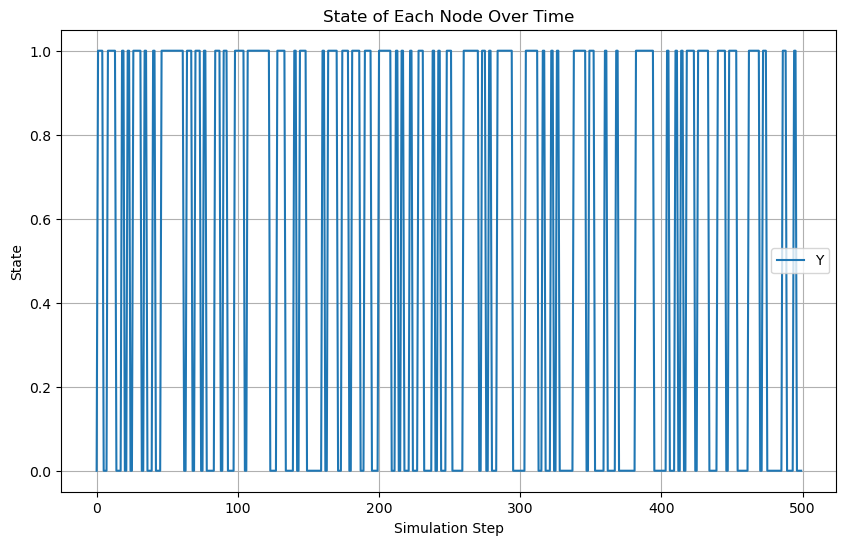

In [50]:
import matplotlib.pyplot as plt

# Assuming 'history' is your list of states from the simulation
steps = range(len(simulation_history))
states_X = [state['X'] for state in simulation_history]
states_Y = [state['Y'] for state in simulation_history]
states_Z = [state['Z'] for state in simulation_history]

plt.figure(figsize=(10, 6))
#plt.plot(steps, states_X, label='X')
plt.plot(steps, states_Y, label='Y')
#plt.plot(steps, states_Z, label='Z')

plt.xlabel('Simulation Step')
plt.ylabel('State')
plt.title('State of Each Node Over Time')
plt.legend()
plt.grid(True)
plt.show()


### Compute the State Transition Graph and
Prime implicants can be used to derive the state transition graph (STG) of a network. To compute it, use the function `primes2stg` of the module `StateTransitionGraphs`. It returns an instance of the NetworkX digraph class.

The second argument to `primes2stg` is either “synchronous” or “asynchronous” for the fully synchronous or the fully asynchronous transition relation, see e.g. [Klarner2015](https://www.frontiersin.org/articles/10.3389/fbioe.2015.00130/full) for a formal definition.

The nodes of an STG are string representations of states, e.g. “110”, see states, [subspaces and paths](https://pyboolnet.readthedocs.io/en/master/manual.html#states-subspaces-paths).

In [22]:
stg = STGs.primes2stg(primes, "asynchronous")
list(stg.nodes())[0]
list(stg.nodes())

['111', '011', '101', '110', '010', '100', '000', '001']